### Serie "white noise"
Una serie temporale è definita "white noise" se le osservazioni sono indipendenti (correlazione 0 fra le osservazioni) e distribuite identicamente con media 0 e varianza costante. Se la serie è ricavata da una distribuzione gaussiana parliamo di "White noise gaussiano".
Le serie temporali "white noise" sono importanti perché così dovrebbero essere distribuiti idealmente i residui di un modello di previsione

Brownlee (2020) Introduction to time series forecasting with Python - cap. 10

Tre domande per capire se una serie è "white noise":

- ha media 0 o no? (media 0)
- la varianza cambia nel tempo? (varianza costante)
- il valore di una certa data è correlato a quelli ritardati?  (correlazione 0)

In [1]:
# Creiamo il whit noise

from random import gauss
from random import seed
from pandas import Series
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot


In [8]:
seed(1)
series = [gauss(0.0, 1.0) for i in range (1000)]
series = Series(series)

In [10]:
print(series.describe())

count    1000.000000
mean       -0.013460
std         0.978981
min        -3.139978
25%        -0.633039
50%        -0.032578
75%         0.615981
max         3.284978
dtype: float64


In [15]:
series = [gauss(0.0, 1.0) for i in range (10000)]
series = Series(series)

In [16]:
print(series.describe())

count    10000.000000
mean        -0.015909
std          1.002781
min         -4.037683
25%         -0.690074
50%         -0.001211
75%          0.672689
max          4.082862
dtype: float64


Facendo il grafico non riscontriamo nessuna tendenza

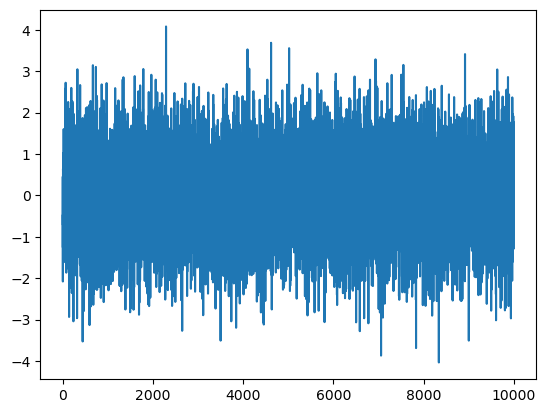

In [17]:
series.plot()
pyplot.show()


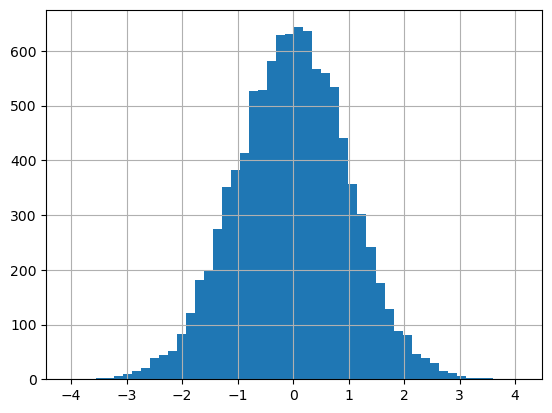

In [19]:
series.hist(bins = 50)
pyplot.show()

Verifichiamo se è vero che le autocorrelazioni (cioè la correlazione di ciascun elemento con quelli precedenti con vari intervalli (ritardi)) sono prossime a 0

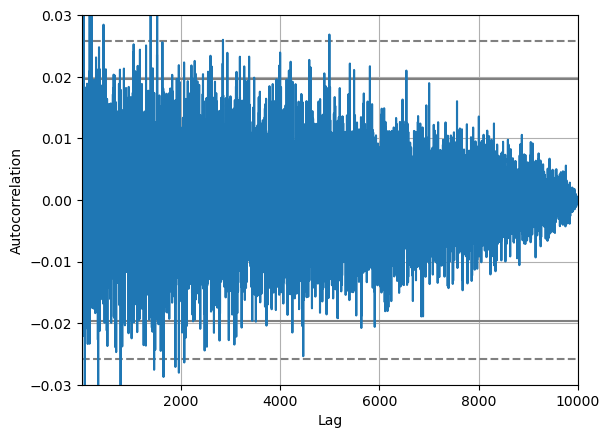

In [20]:
autocorrelation_plot(series)
pyplot.ylim(-0.03, 0.03)
pyplot.show()

### Random walk

In matematica, una passeggiata aleatoria (random walk) è la formalizzazione dell'idea di prendere passi successivi in direzioni casuali. Matematicamente parlando, è il processo stocastico più semplice, il processo markoviano, la cui rappresentazione matematica più nota è costituita dal processo di Wiener.

Un random walk è definito come un processo dove il valore corrente di una variabile dipende  dal valore passago più un termine di errore che si comportra come un white noise
Il termine fu introdotto per la prima volta da Karl Pearson nel 1905.[1]
Brownlee (2020) Introduction to time series forecasting with Python - cap. 10

Generiamo una serie casuale

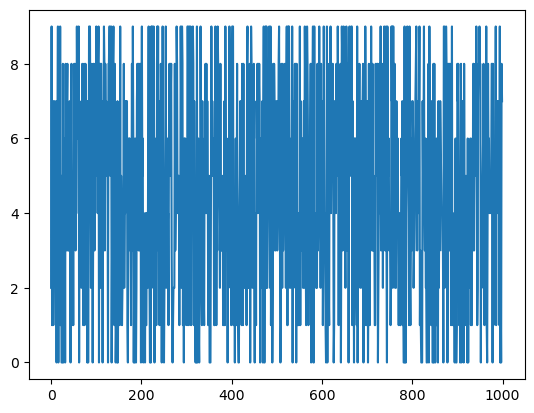

In [21]:
from random import seed
from random import randrange
from matplotlib import pyplot
seed(1)
series = [randrange(10) for i in range(1000)]
pyplot.plot(series)
pyplot.show()

Generiamo una "passeggiata casuale"

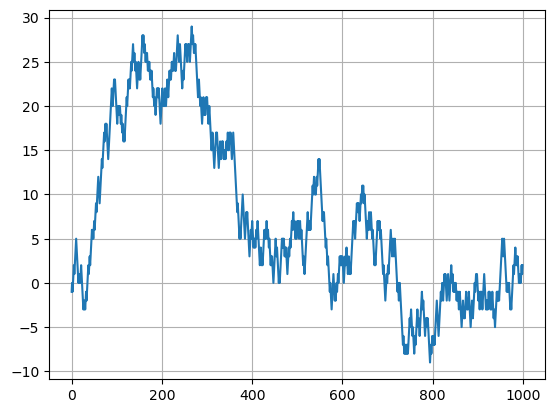

In [24]:
from random import random
#seed(1)
random_walk = list()
random_walk.append(-1 if random() <0.5 else 1)
for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)
pyplot.plot(random_walk)
pyplot.grid(True)
pyplot.show()

Autocorrelazioni

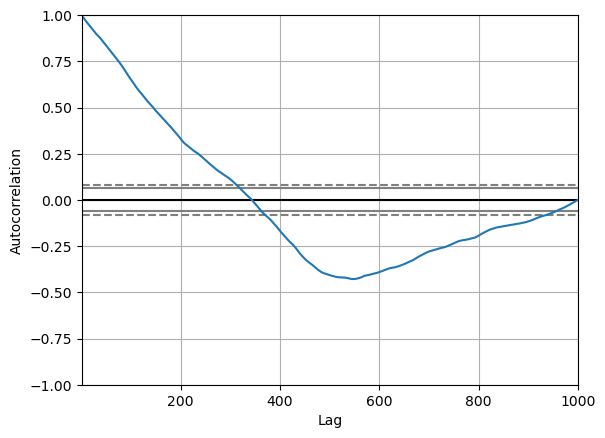

In [25]:
from random import seed
from random import random
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
seed(5)
random_walk = list()
random_walk.append(-1 if random() <0.5 else 1)
for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)
autocorrelation_plot(random_walk)
pyplot.show()

### Stazionarietà

In matematica e statistica, un processo stazionario (o processo fortemente stazionario) è un processo stocastico la cui distribuzione di probabilità congiunta non cambia se viene traslata nel tempo. Di conseguenza, parametri quali la media e la varianza, se sono presenti, pure non cambiano nel tempo.

Poiché la stazionarietà è un presupposto di fondo in molte procedure statistiche utilizzate nell'analisi delle serie storiche, i dati non stazionari sono spesso trasformati per diventare stazionari. La causa più comune di violazione della stazionarietà sono le tendenze in media, che possono essere dovute sia alla presenza di una radice unitaria, sia ad una tendenza deterministica. Nel secondo caso, il processo è chiamato processo con tendenza stazionaria, gli shock stocastici hanno solo effetti transitori e il processo è mean-reverting (su una media che cambia deterministicamente nel tempo). Al contrario, nel primo caso gli shock stocastici hanno effetti permanenti e il processo non è mean-reverting. Un processo con tendenza stazionaria non è strettamente stazionario, ma può facilmente essere reso tale rimuovendo la tendenza di fondo (funzione unicamente del tempo). Analogamente, i processi con una o più radici unitarie possono essere resi stazionari attraverso la differenziazione. Un tipo importante di processo non stazionario che non include un comportamento di tendenza simile è il processo ciclostazionario.

Un "processo stazionario" non è la stessa cosa di un "processo con una distribuzione stazionaria". Infatti, ci sono ulteriori possibilità di confusione con l'uso della parola "stazionario" nel contesto dei processi stocastici; per esempio, talvolta si dice che una catena di Markov omogenea nel tempo ha "probabilità di transizione stazionarie". Inoltre, tutti i processi casuali di Markov stazionari sono omogenei nel tempo.
https://it.wikipedia.org/wiki/Processo_stazionario

### Test di Dickey- Fuller

Nell'analisi delle serie storiche in campo econometrico è possibile che si manifestino dei trend che potrebbero rendere le regressioni spurie.

Questi trend possono essere stocastici, nel caso ci sia non stazionarietà in varianza, o deterministico, nel caso la non stazionarietà sia in media.

Il test di Dickey-Fuller permette di valutare se esiste un trend nelle variabili che renda la regressione spuria. Nel caso sussista tale trend è possibile creare la differenza tra le variabili al tempo t con il tempo t-1 e lavorare su queste.

Tanto per dare un'idea del problema immaginiamo di lavorare su una regressione di due variabili: il PIL del Regno Unito e l'indice dei prezzi al consumo francese. Se effettuassimo la regressione tra queste due variabili osserveremmo che manifesterebbero una relazione significativa (R2 alto e valore p significativo), quando in realtà non esiste nessuna buona ragione economica tale per cui i due indici possano essere collegati.

Hanno lo stesso trend, ovvero entrambe le variabili tendono ad aumentare con il passare del tempo, ma in realtà non hanno relazione tra loro. È per questo che in un caso simile togliamo il trend e valutiamo la relazione che le lega nelle loro diff
https://datatrading.info/test-di-dickey-fuller-aumentato-e-cointegrato-per-la-valutazione-del-pairs-trading/erenze.



In [27]:

from random import seed
from random import random
from statsmodels.tsa.stattools import adfuller # Test Augmented Dickey-Fuller per stazionarietà
# Generiamo il random walk
seed(1)
random_walk = list()
random_walk.append(-1 if random() <0.5 else 1)
for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)
    
# Test statistici
result = adfuller(random_walk)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.341605
p-value: 0.979175
Critical values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


Rendiamo stazionario il random walk facendone le differenze prime

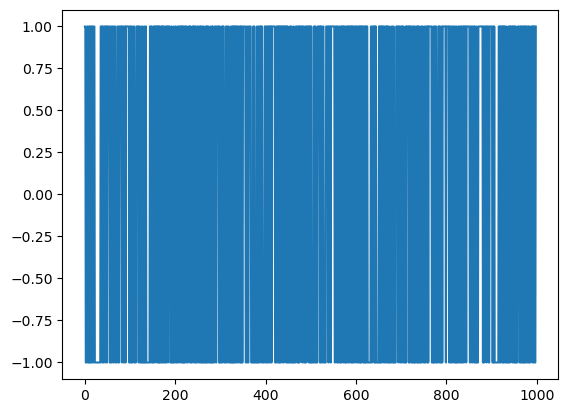

In [28]:
# Generiamo il random walk
seed(1)
random_walk = list()
random_walk.append(-1 if random() <0.5 else 1)
for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)
    
# Creiamo la serie di differenze

diff = list()
for i in range(1, len(random_walk)):
    value = random_walk[i] - random_walk[i-1]
    diff.append(value)
pyplot.plot(diff)
pyplot.show()


Esaminiamo il correlogramma della serie di differenze

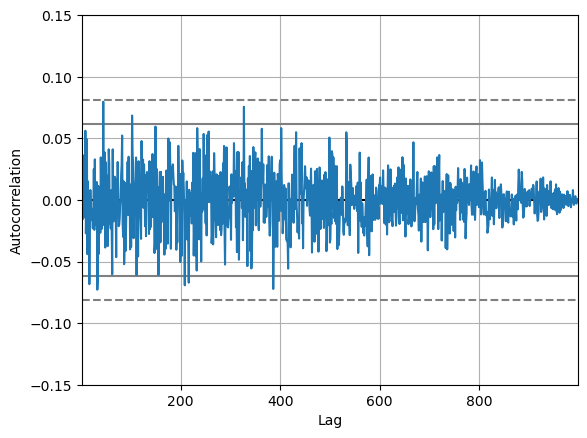

In [29]:
autocorrelation_plot(diff)
pyplot.ylim(-0.15, 0.15)
pyplot.show()

### Misure di precisione delle previsioni

Brownlee (2020) Introduction to time series forecasting with Python - cap. 10

Calcolo dell'errore di previsione

In [30]:
expected = [0.0, 0.5, 0.0, 0.5, 0.0]
predictions = [0.2, 0.4, 0.1, 0.6, 0.2]
forecast_errors = [expected[i] - predictions[i] for i in range(len(expected))]
print('Forecast errors: %s' % forecast_errors)

Forecast errors: [-0.2, 0.09999999999999998, -0.1, -0.09999999999999998, -0.2]


Errore medio di previsione (bias)

In [31]:
bias = sum(forecast_errors)/len(expected)
print('Bias: %f' % bias)

Bias: -0.100000


Errore medio assoluto

In [32]:
from sklearn.metrics import mean_absolute_error
expected = [0.0, 0.5, 0.0, 0.5, 0.0]
predictions = [0.2, 0.4, 0.1, 0.6, 0.2]
mae = mean_absolute_error(expected, predictions)
print('Mae: %f' % mae)

Mae: 0.140000


In [22]:
abs_forecast_errors = [abs(expected[i] - predictions[i]) for i in range(len(expected))]
mae_1 = sum(abs_forecast_errors)/len(expected)
print('Mae_1: %f' % mae_1)

Mae_1: 0.140000


Errore quadratico medio

In [33]:
from sklearn.metrics import mean_squared_error
expected = [0.0, 0.5, 0.0, 0.5, 0.0]
predictions = [0.2, 0.4, 0.1, 0.6, 0.2]
mse = mean_squared_error(expected, predictions)
print('Mse: %f' % mse)

Mse: 0.022000


In [34]:
sqrt_forecast_errors = [(expected[i] - predictions[i])**2 for i in range(len(expected))]
mae_2 = sum(sqrt_forecast_errors)/len(expected)
print('Mae_2: %f' % mae_2)

Mae_2: 0.022000


Root Mean Squared Error (RMSE)  - Radice quadrata dell'errore quadratico medio

In [35]:
from sklearn.metrics import mean_squared_error
from math import sqrt
expected = [0.0, 0.5, 0.0, 0.5, 0.0]
predictions = [0.2, 0.4, 0.1, 0.6, 0.2]
mse = mean_squared_error(expected, predictions)
rmse = sqrt(mse)
print('Rmse: %f' % rmse)

Rmse: 0.148324


#### Si può prevedere un random walk?

Brownlee (2020) Introduction to time series forecasting with Python - cap. 11

Creiamo una "previsione ingenua" (naive forecast) costruita assumendo che il valore di domani sia uguale a quello di oggi (persistence model) 

In [26]:
from sklearn.metrics import mean_squared_error
from math import sqrt
seed(1)
random_walk = list()
random_walk.append(-1 if random() <0.5 else 1)
for i in range(1,1000):
    movement = -1 if random() <0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)

train_size = int(len(random_walk) * 0.66)
train, test = random_walk[0:train_size], random_walk[train_size:]
predictions = list() # oppure semplicemente []
history = train[-1]
for i in range(len(test)):
    yhat = history
    predictions.append(yhat)
    history=test[i]
    
rmse = sqrt(mean_squared_error(test, predictions))
print('Persistence RMSE: %.3f' % rmse)


Persistence RMSE: 1.000


Proviamo con una previsione più sofisticata. Costruiamo le previsioni utilizzando lo stesso processo che crea il random walk, cioè aumenti o diminuzioni di + o - 1.


In [27]:
# Generiamo il random walk
random_walk = list()
random_walk.append(-1 if random() <0.5 else 1)
for i in range(1,1000):
    movement = -1 if random() <0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)

# prepariamo il dataset
train_size = int(len(random_walk) * 0.66)
train, test = random_walk[0:train_size], random_walk[train_size:]
# facciamo le previsioni usando lo stesso processo
predictions = list()
history = train[-1]

for i in range(len(test)):
    yhat = history + (-1 if random() <0.5 else 1)
    predictions.append(yhat)
    history = test[i]
    
rmse = sqrt(mean_squared_error(test, predictions))
print('Random RMSE: %.3f' % rmse)

Random RMSE: 1.427


L'errore è aumentato!

### Creazione dei dati di stima e test (train and test)

Brownlee (2020) Introduction to time series forecasting with Python - cap. 16

Train - test split

Observations: 2820
Training Observations: 1861
Testing Observations: 959


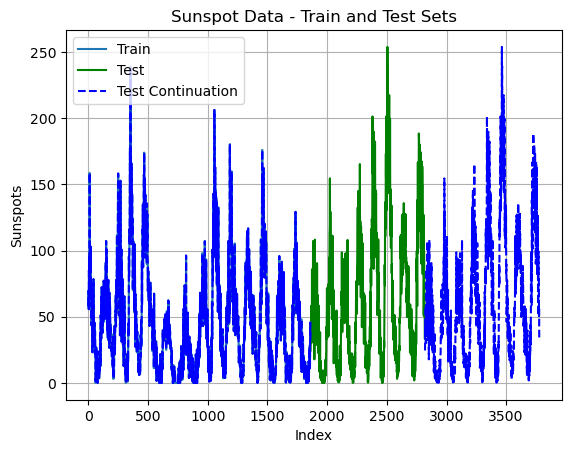

In [41]:
# 147
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the data
series = pd.read_csv('sunspots.csv', header=0, index_col=0, parse_dates=True)
X = series.values

# Split the data into training and testing sets
train_size = int(len(X) * 0.66)
train, test = X[0:train_size], X[train_size:]

# Print the number of observations
print('Observations: %d' % len(X))
print('Training Observations: %d' % len(train))
print('Testing Observations: %d' % len(test))

# Ensure train and test are numpy arrays
train = np.array(train).flatten()
test = np.array(test).flatten()

# Create a combined array with NaN values to represent the gap between train and test data
combined = np.concatenate((train, np.full(len(test), np.nan), test))

# Plot the train data
plt.plot(train, label='Train')

# Plot the test data, offset by the length of the train data
plt.plot(range(len(train), len(train) + len(test)), test, color='g', label='Test')

# Plot the combined data for visual continuity (using '--' for differentiation)
plt.plot(combined, color='b', linestyle='--', label='Test Continuation')

# Adding labels, legend, and title for better understanding of the plot
plt.xlabel('Index')
plt.ylabel('Sunspots')
plt.title('Sunspot Data - Train and Test Sets')
plt.grid(True)
plt.legend()

# Display the plot
plt.show()

Train-Test split multipli con la libreria di scikit-learn TimeSeriesSplit

 Split 1: 705 train, 705 test

 Split 2: 1,410 train, 705 test

 Split 3: 2,115 train, 705 test

Observations: 2820
Training Observations: 705
Testing Observations: 705
Observations: 2820
Training Observations: 1410
Testing Observations: 705
Observations: 2820
Training Observations: 2115
Testing Observations: 705


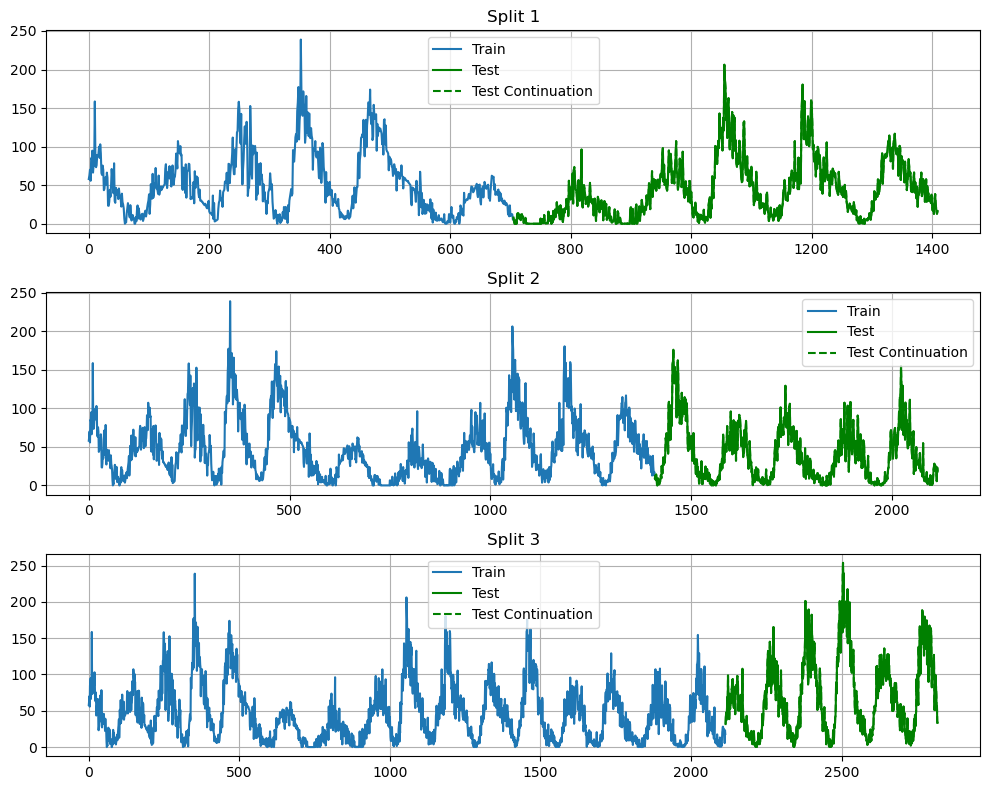

In [45]:

from sklearn.model_selection import TimeSeriesSplit

# Read the data
series = pd.read_csv('sunspots.csv', header=0, index_col=0, parse_dates=True)
X = series.values

# Initialize TimeSeriesSplit
splits = TimeSeriesSplit(n_splits=3)

# Set up the figure
plt.figure(figsize=(10, 8))

# Index for subplot
index = 1

# Iterate through the splits
for train_index, test_index in splits.split(X):
    train = X[train_index]
    test = X[test_index]

    print('Observations: %d' % len(X))
    print('Training Observations: %d' % len(train))
    print('Testing Observations: %d' % len(test))

    # Create subplot
    plt.subplot(310 + index)
    
    # Plot train data
    plt.plot(train, label='Train')
    
    # Plot test data
    plt.plot(range(len(train), len(train) + len(test)), test, color='g', label='Test')

    # Add None values to maintain correct x-axis alignment for test plot
    combined = [None] * len(train) + list(test.flatten())
    plt.plot(combined, color='g', linestyle='--', label='Test Continuation')

    # Add grid, title, and legend
    plt.grid(True)
    plt.title(f'Split {index}')
    plt.legend()

    # Increment subplot index
    index += 1

# Show the plot
plt.tight_layout()
plt.show()